In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tqdm import tqdm_notebook
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

import statsmodels.api as sm
from scipy import stats


from sklearn.feature_selection import f_regression
import operator

plt.style.use('ggplot')

# Придуманный дескриптор

In [2]:
data = pd.read_excel('data.xlsx')
data.head()

,name,associated,energy_delta,lambda,smiles
0,бутадиен,2,553,217,C=CC=C
1,гексатриен,3,481,260,C=CC=CC=C
2,октатетраен,4,397,302,C=CC=CC=CC=C
3,Ликопин,11,237,506,CC(=CCCC(=CC=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=C...
4,Бензол,3,471,255,C1=CC=CC=C1


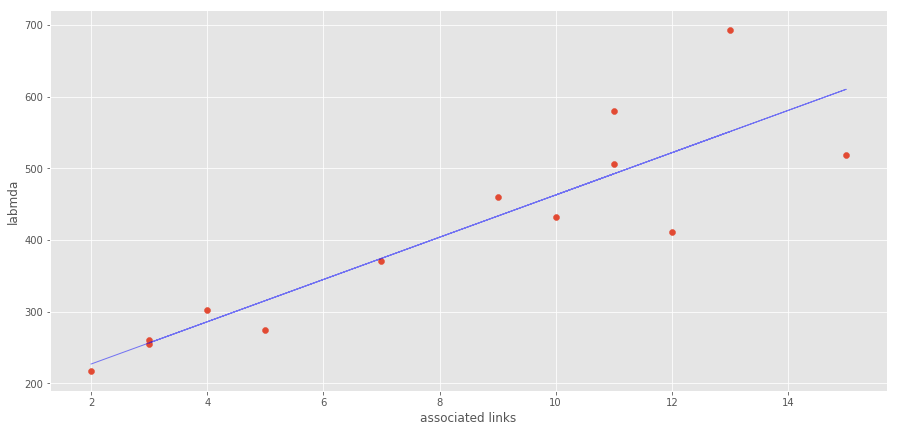

R2 score: 0.788511062174494


In [5]:
X = np.array(data['associated'].astype(float)).reshape(-1,1)
y = np.array(data['lambda'])
model = LinearRegression()
model.fit(X,y)
plt.rcParams["figure.figsize"] = [15,7]
plt.plot(X,model.predict(X), color='blue', linewidth=1.0, alpha=0.5)
plt.scatter(data['associated'].astype(float), data['lambda'].astype(float))
plt.xlabel('associated links')
plt.ylabel('labmda')
plt.show()
print('R2 score:', model.score(X,y))

In [6]:
r2_scores = []
for i in tqdm_notebook(range(1000)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2_scores.append(r2_score(y_test, model.predict(X_test)))
np.max(r2_scores), np.min(r2_scores), np.average(r2_scores)

(0.9937089506707643, -12.342654415001052, 0.4012565367973862)

# Дескрипторы из rdkit

In [7]:
tst = pd.read_csv('data_desc.csv', header=None)
tst = tst.loc[:, (tst != 0).any(axis=0)]
tst

,0,2,3,4,5,6,7,8,9,10,...,97,98,100,104,108,109,110,137,145,147
0,0.061622,48.044,6.782407,0.099087,6.782407,-0.099087,54.046950,54.092,22.0,-0.845370,...,0.0,0.0,0.0,1.0,0.0,1.3584,20.394,2.0,0.0,0.0
1,0.062247,72.066,7.124074,0.099066,7.124074,-0.099066,80.062600,80.130,32.0,-0.940684,...,0.0,0.0,0.0,2.0,0.0,1.9146,29.534,4.0,0.0,0.0
2,0.062268,96.088,7.350000,0.099066,7.350000,-0.099066,106.078250,106.168,42.0,-1.007045,...,0.0,0.0,0.0,3.0,0.0,2.4708,38.674,6.0,0.0,0.0
3,0.062550,480.440,8.579970,0.085571,8.579970,-0.085571,536.438202,536.888,216.0,-4.509930,...,0.0,0.0,0.0,26.0,0.0,12.9380,185.572,26.0,0.0,0.0
4,0.062269,72.066,7.124074,0.062269,7.124074,-0.062269,78.046950,78.114,30.0,-0.457407,...,0.0,1.0,1.0,0.0,1.0,1.6866,26.442,0.0,1.0,0.0
5,0.061630,120.110,7.691667,0.062924,7.691667,-0.061630,128.062600,128.174,48.0,-0.502286,...,0.0,2.0,2.0,0.0,2.0,2.8398,43.948,0.0,2.0,1.0
6,0.061629,168.154,8.259259,0.063580,8.259259,-0.061629,178.078250,178.234,66.0,-0.555013,...,0.0,3.0,3.0,0.0,3.0,3.9930,61.454,0.0,3.0,2.0
7,0.061629,216.198,8.539990,0.063581,8.539990,-0.061629,228.093900,228.294,84.0,-0.597144,...,0.0,4.0,4.0,0.0,4.0,5.1462,78.960,0.0,4.0,3.0
8,0.061629,264.242,8.820720,0.063581,8.820720,-0.061629,278.109550,278.354,102.0,-0.629831,...,0.0,5.0,5.0,0.0,5.0,6.2994,96.466,0.0,5.0,4.0
9,0.061629,312.286,8.988441,0.063581,8.988441,-0.061629,328.125201,328.414,120.0,-0.655511,...,0.0,6.0,6.0,0.0,6.0,7.4526,113.972,0.0,6.0,5.0


In [8]:
X_new = np.array(tst)
X2 = sm.add_constant(X_new)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

c:\users\boris feldman\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
c:\users\boris feldman\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -7.614
Model:                            OLS   Adj. R-squared:                 -7.614
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 13 Mar 2019   Prob (F-statistic):                nan
Time:                        19:16:15   Log-Likelihood:                -96.507
No. Observations:                  13   AIC:                             195.0
Df Residuals:                      12   BIC:                             195.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.933e-37   1.61e-37      1.199      0.2

In [30]:
F_analyse = f_regression(X_new, y)
f = {}
for i, num in enumerate(F_analyse[0]):
    f[i] = num
sorted_f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
indices = []
for ind in range(3):
    #print(tst.columns[sorted_f[ind][0]])
    indices.append(sorted_f[ind][0])
X_new_f = X_new[:, indices]
X_new_f = sm.add_constant(X_new_f)
est = sm.OLS(y, X_new_f)
est2 = est.fit()
print(est2.summary())

c:\users\boris feldman\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     29.05
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           5.84e-05
Time:                        19:17:02   Log-Likelihood:                -67.113
No. Observations:                  13   AIC:                             142.2
Df Residuals:                       9   BIC:                             144.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.3732     89.653      2.793      0.0

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_new_f, y, test_size=0.4, shuffle=True)
X2_train = sm.add_constant(X_train)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
model = LinearRegression()
model.fit(X_train, y_train)
print(r2_score(y_test, model.predict(X_test)))
print(est2.summary())

0.8057743720269934


c:\users\boris feldman\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     58.87
Date:                Wed, 13 Mar 2019   Prob (F-statistic):            0.00365
Time:                        19:17:13   Log-Likelihood:                -28.388
No. Observations:                   7   AIC:                             64.78
Df Residuals:                       3   BIC:                             64.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.2756     80.011      2.166      0.1